# Assignment 2 - Image Enhancement

In [1]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import convert_images

In [2]:
images = []
data_src = Path("data")

for img in data_src.iterdir():
    images.append(cv2.imread(str(img)))

images = np.array(images)
image_index = 0

In [3]:
rgb_images = convert_images(images, cv2.COLOR_BGR2RGB)
lab_images = convert_images(images, cv2.COLOR_BGR2Lab)

In [4]:
x_click = 0
y_click = 0

def mouse_callback(event, x, y, flags, param):
    global x_click, y_click
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Left button clicked at ({x}, {y})")
        x_click = x
        y_click = y

In [5]:
cv2.imshow("Image", images[image_index])
cv2.setMouseCallback('Image', mouse_callback)
cv2.waitKey(0)
cv2.destroyAllWindows()

Left button clicked at (861, 51)


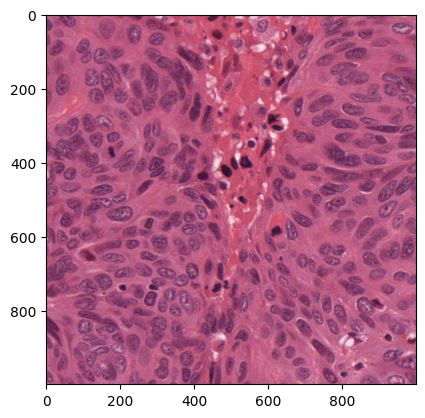

In [6]:
plt.imshow(rgb_images[image_index])

(47.0, 55.0)

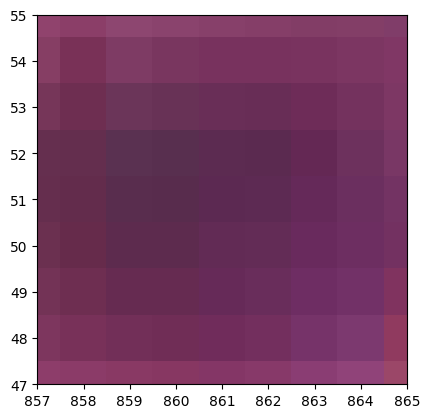

In [7]:
nucleus_radius = 4

x_low = x_click - nucleus_radius
x_high = x_click + nucleus_radius

y_low = y_click - nucleus_radius
y_high = y_click + nucleus_radius

plt.imshow(rgb_images[image_index])
plt.xlim([x_low, x_high])
plt.ylim([y_low, y_high])

In [17]:
lab_img = lab_images[image_index]
split_lab_img = cv2.split(lab_img)
L_ch_nucleus = split_lab_img[0][x_low:x_high, y_low:y_high]
a_ch_nucleus = split_lab_img[1][x_low:x_high, y_low:y_high]
b_ch_nucleus = split_lab_img[2][x_low:x_high, y_low:y_high]

print(L_ch_nucleus.shape)
print(a_ch_nucleus.shape)
print(b_ch_nucleus.shape)

(8, 8)
(8, 8)
(8, 8)


In [18]:
L_mean_nucleus = np.mean(L_ch_nucleus)
a_mean_nucleus = np.mean(a_ch_nucleus)
b_mean_nucleus = np.mean(b_ch_nucleus)

print(L_mean_nucleus, a_mean_nucleus, b_mean_nucleus)

115.9375 169.703125 123.171875


In [25]:
delta_lab = np.zeros((lab_img.shape[0], lab_img.shape[1]), dtype=np.uint8)

for i in range(lab_img.shape[0]):
    for j in range(lab_img.shape[1]):
        delta_L = lab_img[i,j,0] - L_mean_nucleus
        delta_a = lab_img[i,j,1] - a_mean_nucleus
        delta_b = lab_img[i,j,2] - b_mean_nucleus
        delta_E = np.sqrt(delta_L**2 + delta_a**2 + delta_b**2)
        delta_lab[i,j] = delta_E

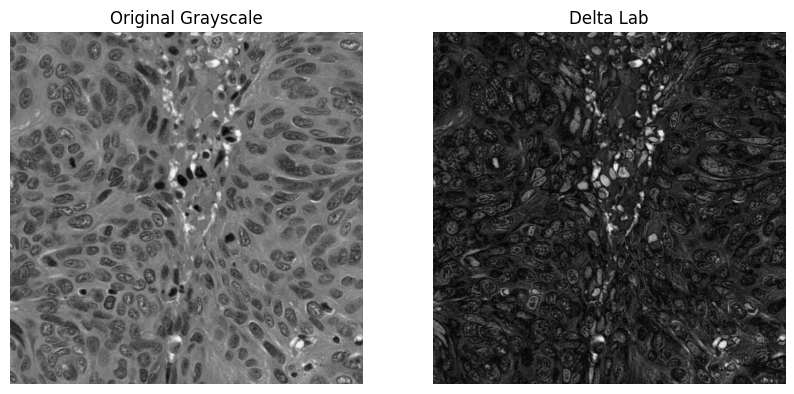

In [26]:
gray_img = cv2.cvtColor(lab_img_new, cv2.COLOR_RGB2GRAY)

rows = 1
columns = 2

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original Grayscale")
plt.imshow(cv2.cvtColor(images[image_index], cv2.COLOR_BGR2GRAY), cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Delta Lab")
plt.imshow(delta_lab, cmap="gray")

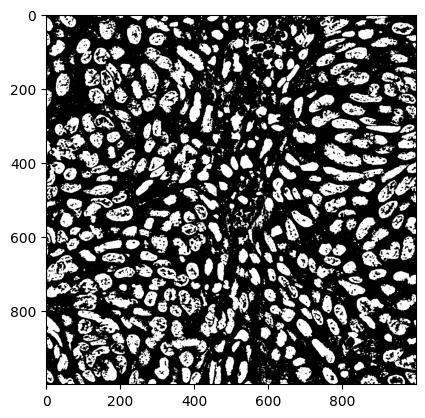

In [13]:
bin_img = cv2.adaptiveThreshold(gray_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 55, 3)
plt.imshow(bin_img, cmap="gray")